<a href="https://colab.research.google.com/github/VarshaS-37/Millet_derived_LAB_analysis/blob/main/nsti_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marker Predicted and NSTI

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = "/content/marker_predicted_and_nsti.tsv"
nsti = pd.read_csv(file_path, sep="\t")

In [ ]:
nsti

,sequence,16S_rRNA_Count,metadata_NSTI
0,millet_PP355677.1,1,0.069765
1,millet_PP355678.1,8,0.122118
2,millet_PP355679.1,8,0.076367
3,millet_PP355680.1,1,0.025597


In [ ]:
#classification of nsti
def classify_nsti(nsti):
    if nsti <= 0.01:
        return "Excellent"
    elif nsti <= 0.05:
        return "Very Good"
    elif nsti <= 0.15:
        return "Good"
    else:
        return "Poor"

nsti["NSTI_Quality"] = nsti["metadata_NSTI"].apply(classify_nsti)

In [ ]:
nsti

,sequence,16S_rRNA_Count,metadata_NSTI,NSTI_Quality
0,millet_PP355677.1,1,0.069765,Good
1,millet_PP355678.1,8,0.122118,Good
2,millet_PP355679.1,8,0.076367,Good
3,millet_PP355680.1,1,0.025597,Very Good


In [ ]:
#Filter high-quality (NSTI ≤ 0.15)

In [ ]:
#Calculate weighted NSTI
weighted_nsti = np.average(
    nsti["metadata_NSTI"],
    weights=nsti["16S_rRNA_Count"]
)
weighted_nsti

np.float64(0.09351344444444445)

In [ ]:
#Sort seqs
top_abundant = nsti.sort_values(by="16S_rRNA_Count", ascending=False)
top_abundant

,sequence,16S_rRNA_Count,metadata_NSTI,NSTI_Quality
1,millet_PP355678.1,8,0.122118,Good
2,millet_PP355679.1,8,0.076367,Good
0,millet_PP355677.1,1,0.069765,Good
3,millet_PP355680.1,1,0.025597,Very Good


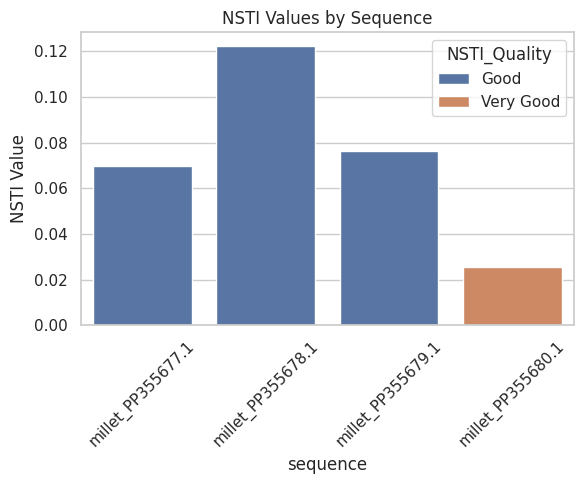

In [ ]:
#plot nsti values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.barplot(x='sequence', y='metadata_NSTI', hue='NSTI_Quality', data=nsti)
plt.xticks(rotation=45)
plt.ylabel('NSTI Value')
plt.title('NSTI Values by Sequence')
plt.tight_layout()
plt.show()